In [133]:
import os.path
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.neighbors import KernelDensity
plt.close("all")

In [120]:
test = pd.read_csv("test.csv") 
val = pd.read_csv("val.csv") 
train = pd.read_csv("train.csv")

(a) We plot the kernel density estimator of the daily average temperature training data and a historgram of the training data. The four bandwidths used are 0.5, 1, 4, and 10.

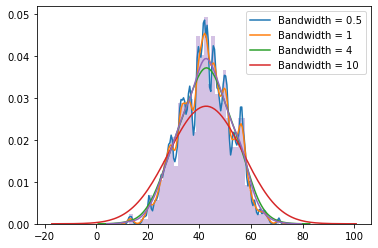

In [121]:
plot = sns.kdeplot(train['AvgTemperature'],bw=0.5, label = "Bandwidth = 0.5")
plot = sns.kdeplot(train['AvgTemperature'],bw=1, label = "Bandwidth = 1")
plot = sns.kdeplot(train['AvgTemperature'],bw=4, label = "Bandwidth = 4")
plot = sns.kdeplot(train['AvgTemperature'],bw=10, label = "Bandwidth = 10")
plot = sns.distplot(train, hist = True, bins = 40)
#The purple line is a fit of the histogram from the sns.distplot function.

(b) We want to determine the optimal bandwidth setting. We test the bandwidths between 0.5 and 10, with 0.5 intervals. We will measure the error against the validation epmf to gauge optimalality.

In [122]:
X = np.array(train['AvgTemperature']).reshape(-1,1)

In [123]:
#bw = np.arange(0, 20, 1)
bandwidths = np.arange(0.5, 10.5, 0.5)
bandwidth_pdf_int_prob = []
for i in bandwidths:
    kde = KernelDensity(kernel = 'gaussian', bandwidth = i).fit(X)
    p = []
    for j in range(1,16):
        x = np.arange(j * 5, (j + 1 ) * 5, 0.1).reshape(-1,1)
        j = np.exp(kde.score_samples(x))
        p.append(np.sum(0.1 * j))
    bandwidth_pdf_int_prob.append(p)

In [124]:
ts = bins.tostring()
cols =np.frombuffer(ts, dtype = int)
kde_prob_est_df = pd.DataFrame(np.row_stack(bandwidth_pdf_int_prob))
kde_prob_est_df.columns = cols
kde_prob_est_df.set_index(bandwidths, inplace = True)
kde_prob_est_df.head()

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75
0.5,1.342266e-11,0.003325,0.004356,0.029384,0.080247,0.119428,0.152768,0.208465,0.171023,0.115456,0.090236,0.018679,0.005043,0.001590,6.534850e-20
1.0,4.152341e-06,0.003139,0.005624,0.029234,0.077997,0.120883,0.153156,0.210111,0.168696,0.116890,0.087564,0.020129,0.005241,0.001334,2.632020e-08
1.5,6.098483e-05,0.002849,0.006587,0.029991,0.076544,0.121020,0.155717,0.206890,0.168102,0.118885,0.084900,0.021614,0.005625,0.001210,4.616503e-06
2.0,1.844032e-04,0.002614,0.007535,0.031109,0.075704,0.120364,0.158394,0.202102,0.167943,0.120748,0.082293,0.023714,0.006059,0.001205,3.128185e-05
2.5,3.291238e-04,0.002527,0.008525,0.032326,0.075305,0.119681,0.160132,0.197189,0.167631,0.122065,0.080216,0.026105,0.006585,0.001301,8.089113e-05


In [125]:
val['Interval'] = pd.cut(val['AvgTemperature'], np.arange(5, 85, 5))

epmf = []

unique_value = np.unique(val['Interval'].values, return_counts = True)
for i in range(len(unique_value[0])):
    epmf.append(unique_value[1][i]/600)
    
epmf.append(0)

print(pd.DataFrame(epmf).head())

          0
0  0.001667
1  0.003333
2  0.011667
3  0.030000
4  0.080000


In [126]:
error = []

for pdf in bandwidth_pdf_int_prob:
    error.append(sum((np.array(pdf) - np.array(epmf)) ** 2))

print(pd.DataFrame(error).head())

          0
0  0.002960
1  0.002994
2  0.002581
3  0.002141
4  0.001833


In [127]:
#The error minimizes at the 8th index, or when the bandwidth is 4.5.

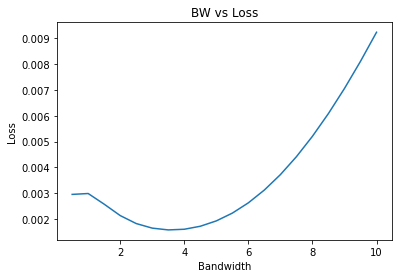

0.0015877964743017464

In [128]:
plt.plot(bandwidths, error)
plt.title("BW vs Loss")
plt.xlabel("Bandwidth")
plt.ylabel("Loss")
plt.show()
min(error)

(c) We graph the optimal bandwidth overlaying the histogram of the test data.

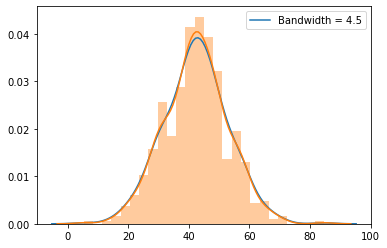

In [129]:
plot2 = sns.kdeplot(test['AvgTemperature'], bw =3.5, label = "Bandwidth = 4.5")
plot2 = sns.distplot(test, hist = True)
#The orange line is a fit line for the histogram from the sns.distplot function.